## Coding logistic regression again from the scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib nbagg

<IPython.core.display.Javascript object>


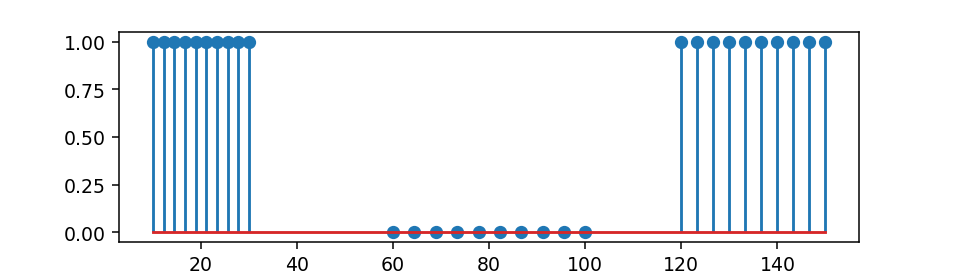

In [2]:
#generating data
#this time some spacing beteween the two classes will 
#be added to let the algorithm find a smoother seperation 
#rather than a sharp decision boundary

m1 = 10
m2 = 10
m3 = 10

x1 = np.linspace(10,30,m1)
x2 = np.linspace(60,100,m2)
x3 = np.linspace(120,150,m3)

y1 = np.ones(m1)
y2 = np.zeros(m2)
y3 = np.ones(m3)

x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))

m = m1 +  m2 + m3

#stem the data
fig,ax = plt.subplots(1,figsize=(7,2))
ax.stem(x,y)
plt.show()


In [231]:
def sigmoid(z):return 1/(1+np.exp(-z))

In [232]:
#making "x" a matrix
def give_engineered_features(x,n_features):
    X = np.array([x]).T
    for exponent in range(2,n_features+1):
        X = np.concatenate((X,np.array([x]).T**exponent),axis=1)
    return X



n_features = 3    
X = give_engineered_features(x,n_features)
print(f"shape of X : {X.shape}")

shape of X : (30, 3)


In [233]:
#try logistic regression

n_w = n_features # how many w-params in y = w1 x1 + w2 x2 + ...  + b
w = np.zeros(n_w) #initial
b = 4000 #initial

w_history = [w]
b_history = [b]
previous_likelihood = "not_set"
lr = 1.0e-3
itertions = 100_000
for i in range(itertions):
    for j in range(n_w):
        w[j] += lr * np.sum((y-sigmoid(X@w+b)) * X[:,j])
        b    += lr * np.sum((y-sigmoid(X@w+b)))
#         if 0 or i%100==0:
#             w_history.append(np.array(w))
#             b_history.append(b)
#             pass
    ##check whetehr the likelihood is increasing in all iterations
    current_likelihood = np.sum(y*np.log(sigmoid(X@w+b)) + (1-y)*np.log(1 -sigmoid(X@w+b)))
    if previous_likelihood!="not_set":
        if previous_likelihood > current_likelihood:
            print(f"Likelihood has decreased at iter:{i}")
            print(f"{previous_likelihood} > {current_likelihood}")
            break
    previous_likelihood = current_likelihood
    
        
print(f"finally w = {w} & b = {b}")

C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_2544/46511442.py:1: RuntimeWarning: overflow encountered in exp
  def sigmoid(z):return 1/(1+np.exp(-z))
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_2544/3388060983.py:21: RuntimeWarning: divide by zero encountered in log
  current_likelihood = np.sum(y*np.log(sigmoid(X@w+b)) + (1-y)*np.log(1 -sigmoid(X@w+b)))
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_2544/3388060983.py:21: RuntimeWarning: invalid value encountered in multiply
  current_likelihood = np.sum(y*np.log(sigmoid(X@w+b)) + (1-y)*np.log(1 -sigmoid(X@w+b)))


finally w = [-2.51955556e+02 -5.36030758e+05  4.51885597e+03] & b = 5794.051000032524


In [234]:
def make_title(w,b):
    out = ""
    for i in range(len(w)):
        if i:out+=" + "
        out += f"({w}) x^{i+1}"
    out += f" + ({b})"
    return out

<IPython.core.display.Javascript object>


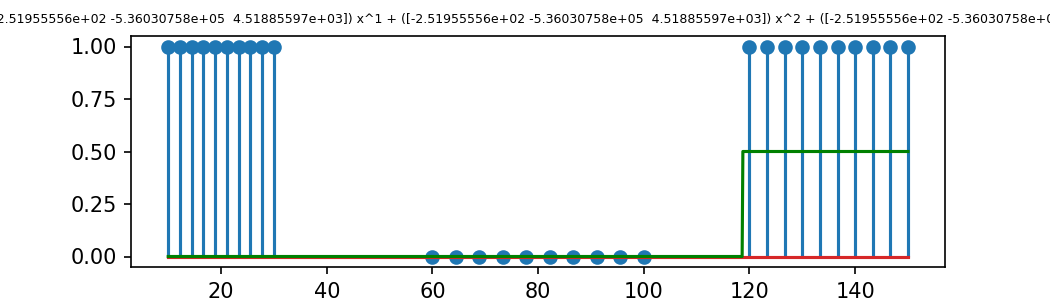

interactive(children=(IntSlider(value=1, description='See history', min=1), Output()), _dom_classes=('widget-i…

In [235]:
#show the results
fig,ax = plt.subplots(1,figsize=(7,2))
ax.stem(x,y)
ax.plot([10,100],[10*w+b,100*w+b])
plt.show()

x_  = np.linspace(x.min(),x.max(),1000)

def update_plot(time_index):
    gamma =2 
    this_time = int((time_index/100)**gamma * (len(w_history)-1)) if time_index != 100 else len(w_history)-1
    
    ax.clear()
    ax.stem(x,y)
    
    X_ = give_engineered_features(x_,n_features)
    y_ = sigmoid(X_@w_history[this_time] + b_history[this_time])/2
    
    
    ax.plot(x_,y_,'g')
    ax.set_title(f"decision boundary@iter={this_time} & {make_title(w_history[this_time],b_history[this_time])}",fontsize=6)


time_index = widgets.IntSlider(description="See history",max=100,min=1,val=100)
widgets.interactive(update_plot,time_index=time_index)

()
